<a href="https://colab.research.google.com/github/nileshmalode11/NER---Named-Entity-Recognition/blob/main/Named_Entity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NER_Dataset.zip", encoding= 'unicode_escape')
# filling the first column that determines which sentence each word belongs to.
data.fillna(method = 'ffill', inplace = True)
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


## **3. Get to know our data**

In [ ]:
def join_a_sentence(sentence_number):

    """
    Args.:
          sentence_number: sentence number we want to join and return.

    Returns:
          The joined sentence.
    """

    sentence_number = str(sentence_number)
    the_sentence_words_list = list(data[data['Sentence #'] == 'Sentence: {}'.format(sentence_number)]['Word'])

    return ' '.join(the_sentence_words_list)

In [ ]:
join_a_sentence(sentence_number = 1)


'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

In [ ]:
join_a_sentence(sentence_number = 100)


'Helicopter gunships Saturday pounded militant hideouts in the Orakzai tribal region , where many Taliban militants are believed to have fled to avoid an earlier military offensive in nearby South Waziristan .'

In [ ]:
data.shape

(1048575, 4)

In [ ]:
len(np.unique(data['Sentence #']))


47959

In [ ]:
print("Number of unique words in the dataset: {}".format(data.Word.nunique()))
print("Number of unique tags in the dataset: {}".format(data.Tag.nunique()))

Number of unique words in the dataset: 35178
Number of unique tags in the dataset: 17


In [ ]:
tags = data.Tag.unique()
tags

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [ ]:
def num_words_tags (tags, data):

    """This functions takes the tags we want to count and the datafram
    and return a dict where the key is the tag and the value is the frequency
    of that tag"""

    tags_count = {}

    for tag in tags:
        len_tag = len(data[data['Tag'] == tag])
        tags_count[tag] = len_tag

    return tags_count

In [ ]:
tags_count = num_words_tags(tags, data)
tags_count

{'O': 887908,
 'B-geo': 37644,
 'B-gpe': 15870,
 'B-per': 16990,
 'I-geo': 7414,
 'B-org': 20143,
 'I-org': 16784,
 'B-tim': 20333,
 'B-art': 402,
 'I-art': 297,
 'I-per': 17251,
 'I-gpe': 198,
 'I-tim': 6528,
 'B-nat': 201,
 'B-eve': 308,
 'I-eve': 253,
 'I-nat': 51}

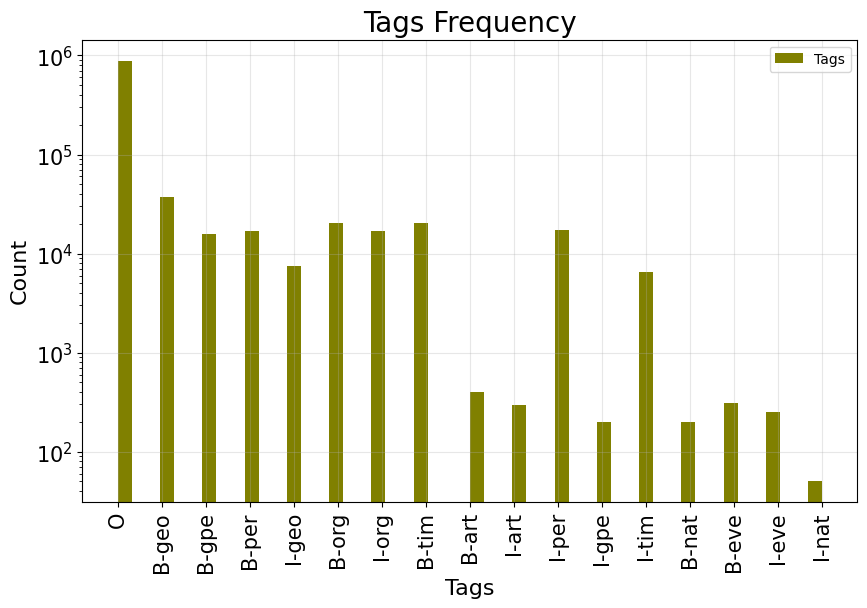

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(data.Tag, log = True, label = 'Tags', color = 'olive', bins = 50)
plt.xlabel('Tags', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title("Tags Frequency", fontsize = 20)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()

### **4. Data Preprocessing**

In [ ]:
ready_data = pd.read_csv("/content/drive/MyDrive/ready_data_csv.zip")
ready_data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
ready_data.shape

(47959, 4)

In [ ]:
X = list(ready_data['Sentence'])
Y = list(ready_data['Tag'])

In [ ]:
from ast import literal_eval
Y_ready = []

for sen_tags in Y:
    Y_ready.append(literal_eval(sen_tags))

In [ ]:
print("First three sentences: \n")
print(X[:3])

First three sentences: 

['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', 'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "', 'They marched from the Houses of Parliament to a rally in Hyde Park .']


In [ ]:
print("First three Tags: \n")
print(Y_ready[:3])

First three Tags: 

[['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']]


We need to tokenize the sentences by mapping each word to a unique identifier, then we need to pad them because NN need the input sentences to have the same lenght.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
print("Number of examples: {}".format(len(X)))

Number of examples: 47959


**Toknize sentences**

In [ ]:
# cutoff reviews after 110 words
maxlen = 110

# consider the top 36000 words in the dataset
max_words = 36000

# tokenize each sentence in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [ ]:
print(tokenizer.word_index)

{'the': 1, 'in': 2, 'of': 3, 'to': 4, 'a': 5, 'and': 6, "'s": 7, 'for': 8, 'has': 9, 'on': 10, 'is': 11, 'that': 12, 'have': 13, 'u': 14, 'with': 15, 'said': 16, 'was': 17, 'at': 18, 'says': 19, 's': 20, 'from': 21, 'by': 22, 'he': 23, 'an': 24, 'as': 25, 'say': 26, 'it': 27, 'are': 28, 'were': 29, 'his': 30, 'president': 31, 'will': 32, 'officials': 33, 'government': 34, 'mr': 35, 'two': 36, 'been': 37, 'killed': 38, 'people': 39, 'after': 40, 'not': 41, 'its': 42, 'be': 43, 'but': 44, 'they': 45, 'more': 46, 'also': 47, 'year': 48, 'new': 49, 'united': 50, 'military': 51, 'last': 52, 'who': 53, 'country': 54, 'than': 55, 'minister': 56, 'police': 57, 'one': 58, 'their': 59, 'iraq': 60, 'which': 61, 'security': 62, 'this': 63, 'about': 64, 'other': 65, 'states': 66, 'had': 67, 'least': 68, 'state': 69, 'three': 70, 'tuesday': 71, 'week': 72, 'since': 73, 'world': 74, 'forces': 75, 'thursday': 76, 'group': 77, 'iran': 78, 'over': 79, 'friday': 80, 'monday': 81, 'wednesday': 82, 'agains

In [ ]:
word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))
ind2word = dict([(value, key) for (key, value) in word_index.items()])

Found 27953 unique tokens.


In [ ]:
print(ind2word)

{1: 'the', 2: 'in', 3: 'of', 4: 'to', 5: 'a', 6: 'and', 7: "'s", 8: 'for', 9: 'has', 10: 'on', 11: 'is', 12: 'that', 13: 'have', 14: 'u', 15: 'with', 16: 'said', 17: 'was', 18: 'at', 19: 'says', 20: 's', 21: 'from', 22: 'by', 23: 'he', 24: 'an', 25: 'as', 26: 'say', 27: 'it', 28: 'are', 29: 'were', 30: 'his', 31: 'president', 32: 'will', 33: 'officials', 34: 'government', 35: 'mr', 36: 'two', 37: 'been', 38: 'killed', 39: 'people', 40: 'after', 41: 'not', 42: 'its', 43: 'be', 44: 'but', 45: 'they', 46: 'more', 47: 'also', 48: 'year', 49: 'new', 50: 'united', 51: 'military', 52: 'last', 53: 'who', 54: 'country', 55: 'than', 56: 'minister', 57: 'police', 58: 'one', 59: 'their', 60: 'iraq', 61: 'which', 62: 'security', 63: 'this', 64: 'about', 65: 'other', 66: 'states', 67: 'had', 68: 'least', 69: 'state', 70: 'three', 71: 'tuesday', 72: 'week', 73: 'since', 74: 'world', 75: 'forces', 76: 'thursday', 77: 'group', 78: 'iran', 79: 'over', 80: 'friday', 81: 'monday', 82: 'wednesday', 83: 'ag

In [ ]:
word2id = word_index

In [ ]:
print(word2id)

{'the': 1, 'in': 2, 'of': 3, 'to': 4, 'a': 5, 'and': 6, "'s": 7, 'for': 8, 'has': 9, 'on': 10, 'is': 11, 'that': 12, 'have': 13, 'u': 14, 'with': 15, 'said': 16, 'was': 17, 'at': 18, 'says': 19, 's': 20, 'from': 21, 'by': 22, 'he': 23, 'an': 24, 'as': 25, 'say': 26, 'it': 27, 'are': 28, 'were': 29, 'his': 30, 'president': 31, 'will': 32, 'officials': 33, 'government': 34, 'mr': 35, 'two': 36, 'been': 37, 'killed': 38, 'people': 39, 'after': 40, 'not': 41, 'its': 42, 'be': 43, 'but': 44, 'they': 45, 'more': 46, 'also': 47, 'year': 48, 'new': 49, 'united': 50, 'military': 51, 'last': 52, 'who': 53, 'country': 54, 'than': 55, 'minister': 56, 'police': 57, 'one': 58, 'their': 59, 'iraq': 60, 'which': 61, 'security': 62, 'this': 63, 'about': 64, 'other': 65, 'states': 66, 'had': 67, 'least': 68, 'state': 69, 'three': 70, 'tuesday': 71, 'week': 72, 'since': 73, 'world': 74, 'forces': 75, 'thursday': 76, 'group': 77, 'iran': 78, 'over': 79, 'friday': 80, 'monday': 81, 'wednesday': 82, 'agains

In [ ]:
# dict. that map each identifier to its word
id2word = {}
for key, value in word2id.items():
    id2word[value] = key

In [ ]:
print(id2word)

{1: 'the', 2: 'in', 3: 'of', 4: 'to', 5: 'a', 6: 'and', 7: "'s", 8: 'for', 9: 'has', 10: 'on', 11: 'is', 12: 'that', 13: 'have', 14: 'u', 15: 'with', 16: 'said', 17: 'was', 18: 'at', 19: 'says', 20: 's', 21: 'from', 22: 'by', 23: 'he', 24: 'an', 25: 'as', 26: 'say', 27: 'it', 28: 'are', 29: 'were', 30: 'his', 31: 'president', 32: 'will', 33: 'officials', 34: 'government', 35: 'mr', 36: 'two', 37: 'been', 38: 'killed', 39: 'people', 40: 'after', 41: 'not', 42: 'its', 43: 'be', 44: 'but', 45: 'they', 46: 'more', 47: 'also', 48: 'year', 49: 'new', 50: 'united', 51: 'military', 52: 'last', 53: 'who', 54: 'country', 55: 'than', 56: 'minister', 57: 'police', 58: 'one', 59: 'their', 60: 'iraq', 61: 'which', 62: 'security', 63: 'this', 64: 'about', 65: 'other', 66: 'states', 67: 'had', 68: 'least', 69: 'state', 70: 'three', 71: 'tuesday', 72: 'week', 73: 'since', 74: 'world', 75: 'forces', 76: 'thursday', 77: 'group', 78: 'iran', 79: 'over', 80: 'friday', 81: 'monday', 82: 'wednesday', 83: 'ag

**Sentences padding**

In [ ]:
print(sequences[:3])

[[260, 3, 997, 13, 1838, 245, 452, 4, 545, 1, 121, 2, 60, 6, 595, 1, 861, 3, 184, 89, 21, 12, 54], [1191, 3, 148, 38, 2, 1, 522, 1120, 1, 604, 53, 591, 5977, 15, 304, 2845, 25, 122, 276, 58, 349, 6, 421, 1, 534], [45, 1838, 21, 1, 2053, 3, 252, 4, 5, 1205, 2, 13669, 3221]]


In [ ]:
# pad the sequences so that all sequences are of the same size
X_preprocessed = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [ ]:
# first example after tokenization and padding.
X_preprocessed[0]

array([ 260,    3,  997,   13, 1838,  245,  452,    4,  545,    1,  121,
          2,   60,    6,  595,    1,  861,    3,  184,   89,   21,   12,
         54,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [ ]:
# 22479 example after tokenization and padding.
X_preprocessed[22479]

array([ 9811,     2,   640,   454,  2760,   155,   944, 15986,  5319,
        1941,     3,    61,  4900,   155,  4877, 22425,  1941,    17,
       13036, 22426, 22427,     6,   699,   325,   428, 22428,  1941,
       13142, 13143, 22429, 22430,    47,   381,    25,  2859,   907,
       22431,  2166,     4,   155,  1229, 22432,  1941,     2,   754,
         629,     3,    61,  4899,   155,   975, 22433,  1941,    17,
       13036,     6,   699,   454,   428, 22434,  1941, 13142, 13143,
        1033,  1453,    21,     1,   257,  3560,    22,     1,  4417,
           3,     1,  5701,     3,  3783,  2111,  1028,  1243, 22435,
          61,  6936,  2197,  3486,     1,   135,  1185,   257,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

**Preprocess tags**

we need to preprocess tags by assigning a unique identifier for each one of them.

Since also tags for each example have different lenght we need to fine a way to slove this problem.

We can assign a new tag for the zeros that we used in padding

We can use the O tag for them.

I will try the second choice of using the O tag to pad the tag list.

In [ ]:
# dict. that map each tag to its identifier
tags2id = {}
for i, tag in enumerate(tags):
    tags2id[tag] = i

In [ ]:
tags2id

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

In [ ]:
# dict. that map each identifier to its tag
id2tag = {}
for key, value in tags2id.items():
    id2tag[value] = key

In [ ]:
id2tag

{0: 'O',
 1: 'B-geo',
 2: 'B-gpe',
 3: 'B-per',
 4: 'I-geo',
 5: 'B-org',
 6: 'I-org',
 7: 'B-tim',
 8: 'B-art',
 9: 'I-art',
 10: 'I-per',
 11: 'I-gpe',
 12: 'I-tim',
 13: 'B-nat',
 14: 'B-eve',
 15: 'I-eve',
 16: 'I-nat'}

In [ ]:
def preprocess_tags(tags2id, Y_ready):

    Y_preprocessed = []
    maxlen = 110
    # for each target
    for y in Y_ready:

        # place holder to store the new preprocessed tag list
        Y_place_holder = []

        # for each tag in rhe tag list
        for tag in y:
            # append the id of the tag in the place holder list
            Y_place_holder.append(tags2id[tag])

        # find the lenght of the new preprocessed tag list
        len_new_tag_list = len(Y_place_holder)
        # find the differance in length between the len of tag list and padded sentences
        num_O_to_add = maxlen - len_new_tag_list

        # add 'O's to padd the tag lists
        padded_tags = Y_place_holder + ([tags2id['O']] * num_O_to_add)
        Y_preprocessed.append(padded_tags)

    return Y_preprocessed

In [ ]:
Y_preprocessed = preprocess_tags(tags2id, Y_ready)

In [ ]:
print(Y_preprocessed[0])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(Y_ready[0])

['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


**By now we have the data ready for training our model**

**We have X_preprocessed and Y_preprocessed that we will use to train our model**

The las step is to split the data into:

Training dataset
Valisdation dataset
testing dataset



**Data shuffling and splitting**

In [ ]:
print("The Lenght of training examples: {}".format(len(X_preprocessed)))
print("The Lenght of training targets: {}".format(len(Y_preprocessed)))

The Lenght of training examples: 47959
The Lenght of training targets: 47959


In [ ]:
X_preprocessed = np.asarray(X_preprocessed)
Y_preprocessed = np.asarray(Y_preprocessed)

In [ ]:
# 70% of the datat will be used for training
training_samples = 0.7
# 15% of the datat will be used for validation
validation_samples = 0.15
# 15% of the datat will be used for testing
testing_samples = 0.15

In [ ]:
indices = np.arange(len(Y_preprocessed))


In [ ]:
np.random.seed(seed=555)
np.random.shuffle(indices)

In [ ]:
X_preprocessed = X_preprocessed[indices]
Y_preprocessed = Y_preprocessed[indices]

In [ ]:
X_train = X_preprocessed[: int(0.7 * len(X_preprocessed))]
print("Number of training examples: {}".format(len(X_train)))


X_val = X_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
print("Number of validation examples: {}".format(len(X_val)))


X_test = X_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]
print("Number of testing examples: {}".format(len(X_test)))



Y_train = Y_preprocessed[: int(0.7 * len(X_preprocessed))]
Y_val = Y_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
Y_test = Y_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]

print("Total number of examples after shuffling and splitting: {}".format(len(X_train) + len(X_val) + len(X_test)))

Number of training examples: 33571
Number of validation examples: 7194
Number of testing examples: 7194
Total number of examples after shuffling and splitting: 47959


## **5. Model Training and Evaluation**


In [ ]:
X_train[1000]

array([ 374,   19,    1,  254,   28, 1072,    6,   11, 1201,   59,  412,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [ ]:
Y_train[1000]

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
id2word[729]

'nigeria'

**Load dataset to the model using train_dataset = tf.data.Datase**

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [ ]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
embedding_dim = 300
maxlen = 110
max_words = 36000
num_tags = len(tags)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 110, 300)          10800000  
                                                                 
 bidirectional (Bidirectiona  (None, 110, 200)         320800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 110, 200)         240800    
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 110, 17)          3417      
 ibuted)                                                         
                                                                 
Total params: 11,365,017
Trainable params: 11,365,017
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=15)

Epoch 1/15
255/255 [==============================] - 576s 2s/step - loss: 0.1863 - accuracy: 0.9660 - val_loss: 0.1113 - val_accuracy: 0.9708
Epoch 2/15
255/255 [==============================] - 563s 2s/step - loss: 0.0931 - accuracy: 0.9735 - val_loss: 0.0775 - val_accuracy: 0.9766
Epoch 3/15
255/255 [==============================] - 555s 2s/step - loss: 0.0666 - accuracy: 0.9786 - val_loss: 0.0684 - val_accuracy: 0.9787
Epoch 4/15
255/255 [==============================] - 555s 2s/step - loss: 0.0544 - accuracy: 0.9815 - val_loss: 0.0650 - val_accuracy: 0.9801
Epoch 5/15
255/255 [==============================] - 550s 2s/step - loss: 0.0457 - accuracy: 0.9842 - val_loss: 0.0673 - val_accuracy: 0.9806
Epoch 6/15
255/255 [==============================] - 537s 2s/step - loss: 0.0399 - accuracy: 0.9862 - val_loss: 0.0701 - val_accuracy: 0.9808
Epoch 7/15
255/255 [==============================] - 540s 2s/step - loss: 0.0356 - accuracy: 0.9876 - val_loss: 0.0724 - val_accuracy: 0.9808

In [ ]:
model.evaluate(test_dataset)

NameError: ignored

In [ ]:
def make_prediction(model, preprocessed_sentence, id2word, id2tag):

    #if preprocessed_sentence.shape() != (1, 110):
    preprocessed_sentence = preprocessed_sentence.reshape((1, 110))

    # return preprocessed sentence to its orginal form
    sentence = preprocessed_sentence[preprocessed_sentence > 0]
    word_list = []
    for word in list(sentence):
        word_list.append(id2word[word])
    orginal_sententce = ' '.join(word_list)

    len_orginal_sententce = len(word_list)

    # make prediction
    prediction = model.predict(preprocessed_sentence)
    prediction = np.argmax(prediction[0], axis=1)

    # return the prediction to its orginal form
    prediction = list(prediction)[ : len_orginal_sententce]

    pred_tag_list = []
    for tag_id in prediction:
        pred_tag_list.append(id2tag[tag_id])

    return orginal_sententce,  pred_tag_list

In [ ]:

orginal_sententce,  pred_tag_list = make_prediction(model=model,
                                                    preprocessed_sentence=X_test[520],
                                                    id2word=id2word,
                                                    id2tag=id2tag)

In [ ]:
print(orginal_sententce)

In [ ]:
print(pred_tag_list)